In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [5]:
sns.set_theme(style='whitegrid')
try:
    df = pd.read_csv('../Data/birds_db.csv')
except FileNotFoundError:
    exit()

target_species = 'Collared flycatcher'
bird_data = df[df['species'] == target_species].copy()

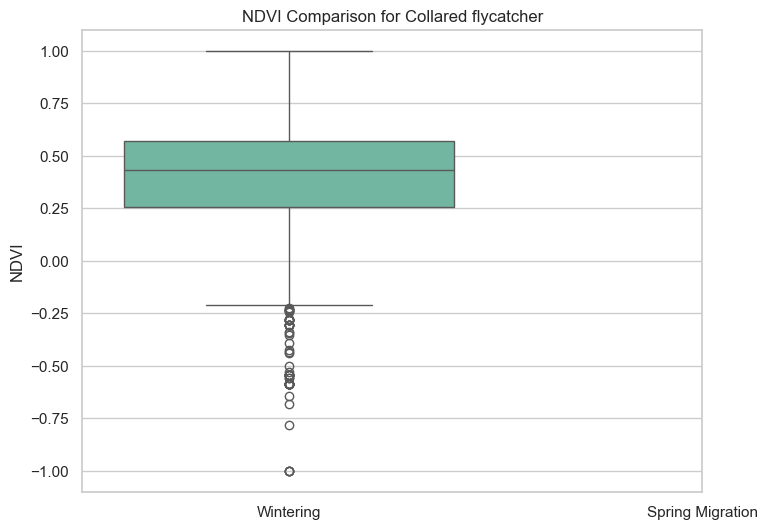

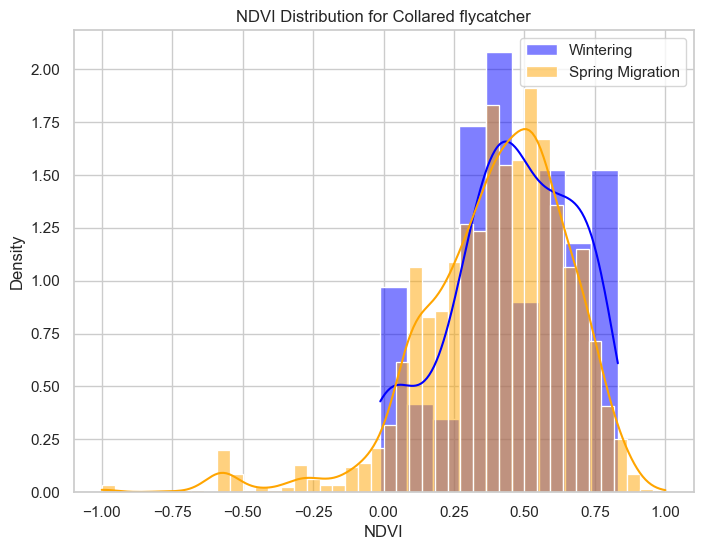

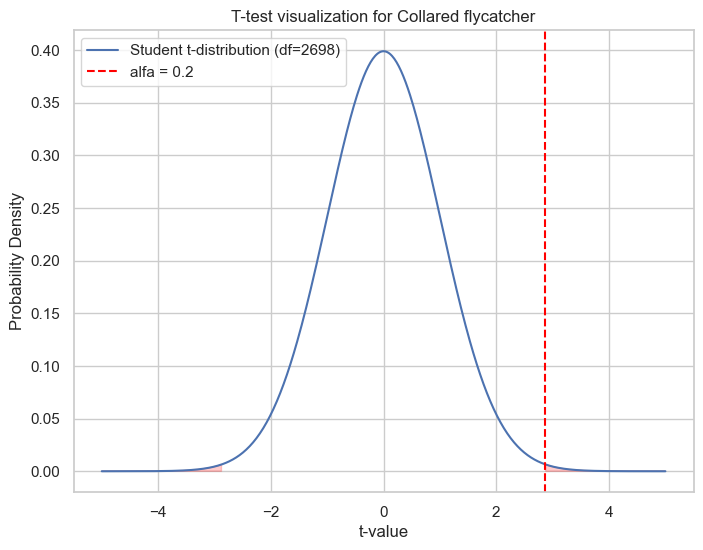

In [ ]:
target_species = 'Collared flycatcher'
bird_data = df[df['species'] == target_species].copy()

winter = bird_data[bird_data['phase'].str.contains('Wintering', case=False, na=False)]['ndvi']
breeding = bird_data[bird_data['phase'].str.contains('Spring Migration', case=False, na=False)]['ndvi']


plt.figure(figsize=(8,6))
sns.boxplot(data=[winter, breeding], palette='Set2')
plt.xticks([0, 1], ['Wintering', 'Spring Migration'])
plt.ylabel('NDVI')
plt.title(f'NDVI Comparison for {target_species}')
plt.show()

# ----- Overlayed Histograms -----
plt.figure(figsize=(8,6))
sns.histplot(winter, color='blue', label='Wintering', kde=True, stat='density', alpha=0.5)
sns.histplot(breeding, color='orange', label='Spring Migration', kde=True, stat='density', alpha=0.5)
plt.xlabel('NDVI')
plt.ylabel('Density')
plt.title(f'NDVI Distribution for {target_species}')
plt.legend()
plt.show()

# ----- T-distribution plot with t-statistic -----
if len(winter) > 1 and len(breeding) > 1:
    t_stat, p_val = stats.ttest_ind(winter, breeding, nan_policy='omit')
    df_deg = len(winter) + len(breeding) - 2
    x = np.linspace(-5, 5, 500)
    y = stats.t.pdf(x, df=df_deg)
    
    plt.figure(figsize=(8,6))
    plt.plot(x, y, label=f'Student t-distribution')
    plt.axvline(t_stat, color='red', linestyle='--', label=f'alfa = 0.2')
    plt.fill_between(x, 0, y, where=(x >= abs(t_stat)) | (x <= -abs(t_stat)), color='red', alpha=0.2)
    plt.title(f'T-test visualization for {target_species}')
    plt.xlabel('t-value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()

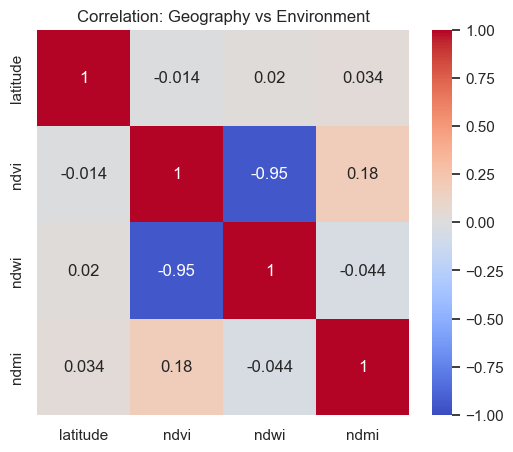

In [7]:
cols = ['latitude', 'ndvi', 'ndwi', 'ndmi']
valid_cols = [c for c in cols if c in bird_data.columns]
corr = bird_data[valid_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation: Geography vs Environment')
plt.show()